<a href="https://colab.research.google.com/github/edlaprathyusha/project-on-data-science/blob/main/Naval_propulsion_plants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
uploaded=files.upload()

Saving naval_vessel.csv to naval_vessel (2).csv


In [ ]:
data = pd.read_csv("/content/naval_vessel.csv", names=["LEVER POSITION","SHIP SPEED","GAS TURBINE SHAFT TORQUE","GAS TURBINE RATE OF REVOLUTIONS","GAS GENERATOR RATE OF REVOLUTIONS",
                          "STARBOARD PROPELLER TORQUE","PORT PROPELLER TORQUE","HP TURBINE EXIT TEMPERATURE","GT COMPRESSOR INLET AIR TEMPERATURE",
                          "GT COMPRESSOR OUTLET AIR TEMPERATURE","HP TURBINE EXIT PRESSURE","GT COMPRESSOR INLET AIR PRESSURE","GT COMPRESSOR OUTLET AIR PRESSURE",
                          "GAS TURBINE EXHAUST GAS PRESSURE","TURBINE INJECTON CONTROL","FUEL FLOW","GT COMPRESSOR DECAY STATE COEFFICIENT","GT TURBINE DECAY STATE COEFFICIENT"])
data.head(18)

# DATA AND DATA QUALITY CHECK



In [ ]:
print(data.shape)

(11934, 18)


In [ ]:
data.isnull().sum()

LEVER POSITION                           0
SHIP SPEED                               0
GAS TURBINE SHAFT TORQUE                 0
GAS TURBINE RATE OF REVOLUTIONS          0
GAS GENERATOR RATE OF REVOLUTIONS        0
STARBOARD PROPELLER TORQUE               0
PORT PROPELLER TORQUE                    0
HP TURBINE EXIT TEMPERATURE              0
GT COMPRESSOR INLET AIR TEMPERATURE      0
GT COMPRESSOR OUTLET AIR TEMPERATURE     0
HP TURBINE EXIT PRESSURE                 0
GT COMPRESSOR INLET AIR PRESSURE         0
GT COMPRESSOR OUTLET AIR PRESSURE        0
GAS TURBINE EXHAUST GAS PRESSURE         0
TURBINE INJECTON CONTROL                 0
FUEL FLOW                                0
GT COMPRESSOR DECAY STATE COEFFICIENT    0
GT TURBINE DECAY STATE COEFFICIENT       0
dtype: int64

In [ ]:
data.describe()

,LEVER POSITION,SHIP SPEED,GAS TURBINE SHAFT TORQUE,GAS TURBINE RATE OF REVOLUTIONS,GAS GENERATOR RATE OF REVOLUTIONS,STARBOARD PROPELLER TORQUE,PORT PROPELLER TORQUE,HP TURBINE EXIT TEMPERATURE,GT COMPRESSOR INLET AIR TEMPERATURE,GT COMPRESSOR OUTLET AIR TEMPERATURE,HP TURBINE EXIT PRESSURE,GT COMPRESSOR INLET AIR PRESSURE,GT COMPRESSOR OUTLET AIR PRESSURE,GAS TURBINE EXHAUST GAS PRESSURE,TURBINE INJECTON CONTROL,FUEL FLOW,GT COMPRESSOR DECAY STATE COEFFICIENT,GT TURBINE DECAY STATE COEFFICIENT
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.533635e-13,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   LEVER POSITION                         11934 non-null  float64
 1   SHIP SPEED                             11934 non-null  float64
 2   GAS TURBINE SHAFT TORQUE               11934 non-null  float64
 3   GAS TURBINE RATE OF REVOLUTIONS        11934 non-null  float64
 4   GAS GENERATOR RATE OF REVOLUTIONS      11934 non-null  float64
 5   STARBOARD PROPELLER TORQUE             11934 non-null  float64
 6   PORT PROPELLER TORQUE                  11934 non-null  float64
 7   HP TURBINE EXIT TEMPERATURE            11934 non-null  float64
 8   GT COMPRESSOR INLET AIR TEMPERATURE    11934 non-null  float64
 9   GT COMPRESSOR OUTLET AIR TEMPERATURE   11934 non-null  float64
 10  HP TURBINE EXIT PRESSURE               11934 non-null  float64
 11  GT

#correlation

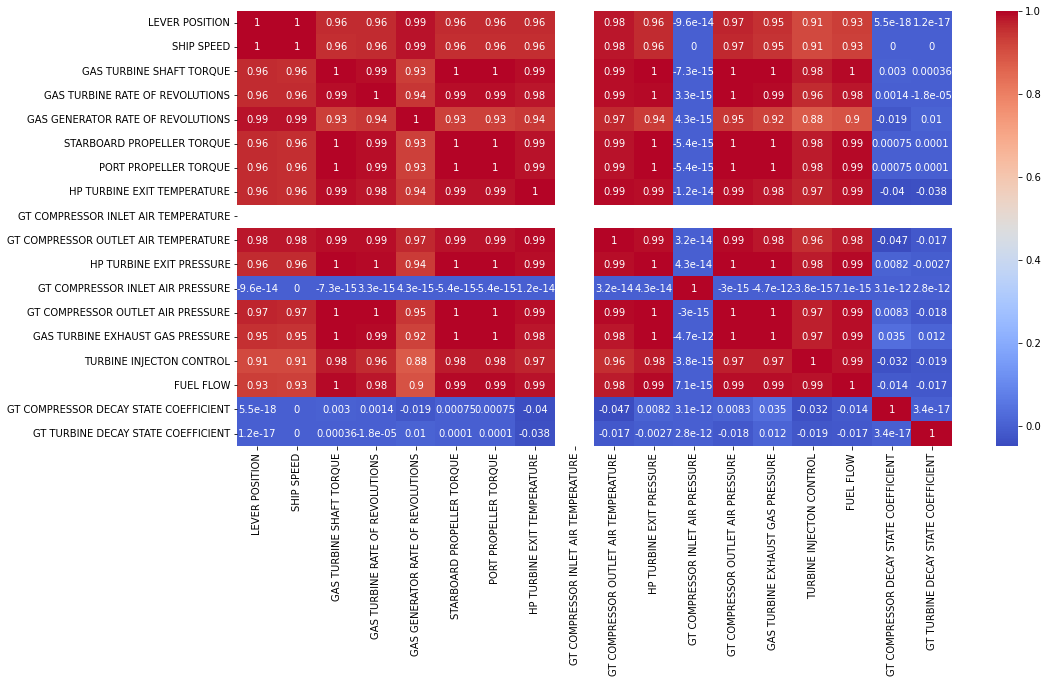

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

In [ ]:
data.corr()['GT COMPRESSOR DECAY STATE COEFFICIENT'].sort_values()



GT COMPRESSOR OUTLET AIR TEMPERATURE    -4.717657e-02
HP TURBINE EXIT TEMPERATURE             -3.962512e-02
TURBINE INJECTON CONTROL                -3.203662e-02
GAS GENERATOR RATE OF REVOLUTIONS       -1.883800e-02
FUEL FLOW                               -1.366765e-02
SHIP SPEED                               0.000000e+00
LEVER POSITION                           5.534971e-18
GT TURBINE DECAY STATE COEFFICIENT       3.415191e-17
GT COMPRESSOR INLET AIR PRESSURE         3.084967e-12
STARBOARD PROPELLER TORQUE               7.535000e-04
PORT PROPELLER TORQUE                    7.535000e-04
GAS TURBINE RATE OF REVOLUTIONS          1.369908e-03
GAS TURBINE SHAFT TORQUE                 2.978258e-03
HP TURBINE EXIT PRESSURE                 8.167586e-03
GT COMPRESSOR OUTLET AIR PRESSURE        8.327871e-03
GAS TURBINE EXHAUST GAS PRESSURE         3.528524e-02
GT COMPRESSOR DECAY STATE COEFFICIENT    1.000000e+00
GT COMPRESSOR INLET AIR TEMPERATURE               NaN
Name: GT COMPRESSOR DECAY ST

In [ ]:
data.corr()['GT TURBINE DECAY STATE COEFFICIENT'].sort_values()

HP TURBINE EXIT TEMPERATURE             -3.846390e-02
TURBINE INJECTON CONTROL                -1.887184e-02
GT COMPRESSOR OUTLET AIR PRESSURE       -1.830336e-02
FUEL FLOW                               -1.732675e-02
GT COMPRESSOR OUTLET AIR TEMPERATURE    -1.685505e-02
HP TURBINE EXIT PRESSURE                -2.718186e-03
GAS TURBINE RATE OF REVOLUTIONS         -1.776556e-05
SHIP SPEED                               0.000000e+00
LEVER POSITION                           1.198473e-17
GT COMPRESSOR DECAY STATE COEFFICIENT    3.415191e-17
GT COMPRESSOR INLET AIR PRESSURE         2.790032e-12
PORT PROPELLER TORQUE                    1.044235e-04
STARBOARD PROPELLER TORQUE               1.044235e-04
GAS TURBINE SHAFT TORQUE                 3.576383e-04
GAS GENERATOR RATE OF REVOLUTIONS        1.000011e-02
GAS TURBINE EXHAUST GAS PRESSURE         1.179423e-02
GT TURBINE DECAY STATE COEFFICIENT       1.000000e+00
GT COMPRESSOR INLET AIR TEMPERATURE               NaN
Name: GT TURBINE DECAY STATE

#PAIRPLOTS

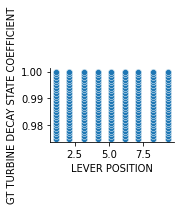

In [ ]:
sns.pairplot(data ,x_vars="LEVER POSITION",y_vars="GT TURBINE DECAY STATE COEFFICIENT")


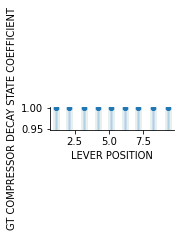

In [ ]:
sns.pairplot(data ,x_vars="LEVER POSITION",y_vars="GT COMPRESSOR DECAY STATE COEFFICIENT")

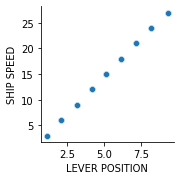

In [ ]:
sns.pairplot(data ,x_vars="LEVER POSITION",y_vars="SHIP SPEED")

# TRAIN AND TEST ALGORITHM(REGRESSION MODEL)

# 1) GT COMPRESSOR DECAY STATE COEFICIENT

In [16]:
x=data.drop(["GT COMPRESSOR DECAY STATE COEFFICIENT","GT TURBINE DECAY STATE COEFFICIENT"],axis=1).values
y=data["GT COMPRESSOR DECAY STATE COEFFICIENT"].values

In [17]:
print(x)

[[1.1380000e+00 3.0000000e+00 2.8996400e+02 ... 1.0190000e+00
  7.1370000e+00 8.2000000e-02]
 [2.0880000e+00 6.0000000e+00 6.9601800e+03 ... 1.0190000e+00
  1.0655000e+01 2.8700000e-01]
 [3.1440000e+00 9.0000000e+00 8.3792290e+03 ... 1.0200000e+00
  1.3086000e+01 2.5900000e-01]
 ...
 [7.1480000e+00 2.1000000e+01 3.9003867e+04 ... 1.0360000e+00
  4.2104000e+01 8.3400000e-01]
 [8.2060000e+00 2.4000000e+01 5.0992579e+04 ... 1.0430000e+00
  5.8064000e+01 1.1490000e+00]
 [9.3000000e+00 2.7000000e+01 7.2775130e+04 ... 1.0520000e+00
  8.6067000e+01 1.7040000e+00]]


In [18]:
print(y)

[0.95 0.95 0.95 ... 1.   1.   1.  ]


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=7)

In [20]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred=lm.predict(x_test)
print(y_pred)

[0.98094627 0.9616848  0.95960616 ... 0.99075032 0.98983527 0.94804158]


In [22]:
lm.coef_

array([ 2.61184053e-01, -7.65232803e-02, -3.87380789e-07, -2.86450185e-05,
        3.06160248e-05, -5.58789308e-04, -5.58789308e-04,  7.17172780e-07,
        4.78783679e-16, -3.40064780e-03,  1.86384826e-01, -3.33066882e-16,
        1.40810391e-02,  6.90726108e-01, -7.24846091e-04,  2.19692300e-01])

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.845178765905068

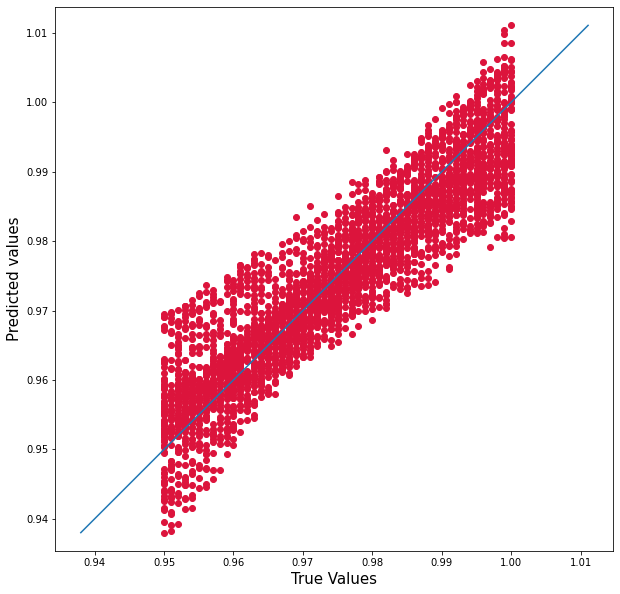

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2])
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'actual vs predicted')

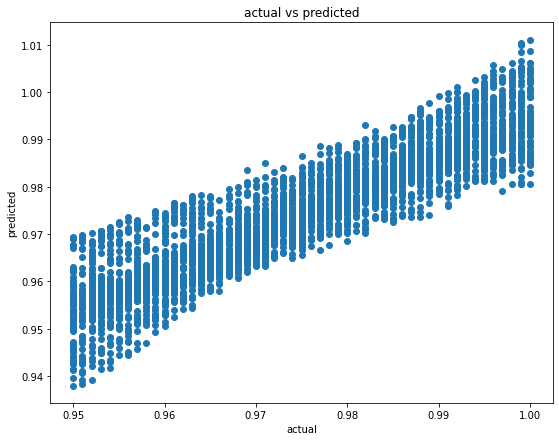

In [25]:
plt.figure(figsize=(9,7))
plt.scatter(y_test,y_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("actual vs predicted")

In [26]:
pred_y_df=pd.DataFrame({"Actual value":y_test, "Predicted value":y_pred, "difference":y_test-y_pred})
pred_y_df[0:20]

,Actual value,Predicted value,difference
0,0.983,0.980946,0.002054
1,0.956,0.961685,-0.005685
2,0.952,0.959606,-0.007606
3,0.964,0.963396,0.000604
4,0.996,0.998329,-0.002329
5,0.989,0.985435,0.003565
6,0.960,0.952867,0.007133
7,0.951,0.951632,-0.000632
8,0.983,0.987629,-0.004629
9,0.971,0.968821,0.002179


In [27]:
linear_prediction=lm.predict(x_test)
print("train score:{}\n".format(lm.score(x_train,y_train)))
print("test score:{}\n".format(lm.score(x_test,y_test)))
print("overall model accuracy:{}\n".format(r2_score(y_test,linear_prediction)))
print("mean squared error:{}\n".format(mean_squared_error(y_test,linear_prediction)))

train score:0.8420870507204934

test score:0.845178765905068

overall model accuracy:0.845178765905068

mean squared error:3.3249756130802264e-05



In [28]:
import statsmodels.api as sm
m=sm.OLS(y_train,x_train)
m=m.fit()
print(m.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.842      
Dependent Variable: y                AIC:                -62128.6293
Date:               2021-12-28 09:00 BIC:                -62030.2040
No. Observations:   8353             Log-Likelihood:     31078.     
Df Model:           13               F-statistic:        3421.      
Df Residuals:       8339             Prob (F-statistic): 0.00       
R-squared:          0.842            Scale:              3.4401e-05 
----------------------------------------------------------------------
             Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
----------------------------------------------------------------------
x1           0.2612     0.0051    51.5857   0.0000    0.2513    0.2711
x2          -0.0765     0.0016   -48.4257   0.0000   -0.0796   -0.0734
x3          -0.0000     0.0000    -0.9656   0.3343   -0.0000    0.0000
x4          -0.0000     0.0000    -8.6339

# 2) GT TURBINE DECAY STATE COEFFICIENT 

In [29]:
x=data.drop(["GT COMPRESSOR DECAY STATE COEFFICIENT","GT TURBINE DECAY STATE COEFFICIENT"],axis=1).values
y1=data["GT TURBINE DECAY STATE COEFFICIENT"].values

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=0.3, random_state=7)

In [31]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y1_train)

LinearRegression()

In [32]:
y1_pred=lm.predict(x_test)
print(y1_pred)

[0.99036074 0.98443801 0.99328018 ... 0.97325661 0.97552391 0.98952022]


In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_score(y1_test,y1_pred)

0.9132793797111418

In [34]:
lm.coef_

array([-4.07947218e-05,  6.21579227e-03,  1.37384693e-05,  6.47684441e-05,
        3.15362856e-05, -7.90615459e-04, -7.90615459e-04, -6.77983224e-04,
        6.05852174e-16,  1.80355483e-04,  8.42668005e-02, -4.44089187e-16,
       -5.40080891e-02,  9.41548585e-01, -2.33182115e-04,  3.58393945e-01])

In [35]:
linear_prediction1=lm.predict(x_test)
print("train score:{}\n".format(lm.score(x_train,y1_train)))
print("test score:{}\n".format(lm.score(x_test,y1_test)))
print("overall model accuracy:{}\n".format(r2_score(y1_test,linear_prediction1)))
print("mean squared error:{}\n".format(mean_squared_error(y1_test,linear_prediction1)))

train score:0.9099224338123983

test score:0.9132793797111418

overall model accuracy:0.9132793797111418

mean squared error:4.9382208574945344e-06



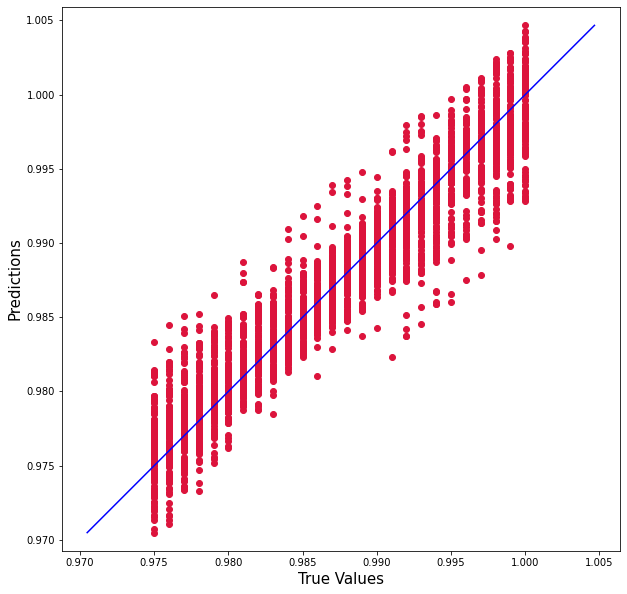

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(y1_test, y1_pred, c='crimson')
p1 = max(max(y1_pred), max(y1_test))
p2 = min(min(y1_pred), min(y1_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'actual vs predicted')

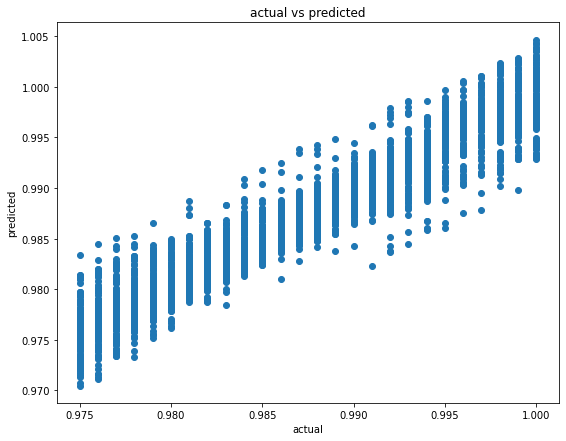

In [37]:
plt.figure(figsize=(9,7))
plt.scatter(y1_test,y1_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("actual vs predicted")

In [38]:
pred_y1_df=pd.DataFrame({"Actual value":y1_test, "Predicted value":y1_pred, "difference":y1_test-y1_pred})
pred_y1_df[0:20]

,Actual value,Predicted value,difference
0,0.990,0.990361,-0.000361
1,0.981,0.984438,-0.003438
2,0.993,0.993280,-0.000280
3,0.980,0.980700,-0.000700
4,0.977,0.976848,0.000152
5,0.990,0.992459,-0.002459
6,0.994,0.996547,-0.002547
7,0.976,0.976004,-0.000004
8,0.999,0.998104,0.000896
9,0.987,0.987228,-0.000228


In [39]:
import statsmodels.api as sm
m=sm.OLS(y1_train,x_train)
m=m.fit()
print(m.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.910      
Dependent Variable: y                AIC:                -78157.9459
Date:               2021-12-28 09:01 BIC:                -78059.5206
No. Observations:   8353             Log-Likelihood:     39093.     
Df Model:           13               F-statistic:        6480.      
Df Residuals:       8339             Prob (F-statistic): 0.00       
R-squared:          0.910            Scale:              5.0485e-06 
----------------------------------------------------------------------
            Coef.    Std.Err.       t       P>|t|     [0.025    0.975]
----------------------------------------------------------------------
x1         -0.0000     0.0019     -0.0210   0.9832   -0.0038    0.0038
x2          0.0062     0.0006     10.2679   0.0000    0.0050    0.0074
x3          0.0000     0.0000     89.3923   0.0000    0.0000    0.0000
x4          0.0001     0.0000     50.9596